# Part II - Effects of loan attributes on amount of Percent Funded
## by Hafsah Anibaba

## Investigation Overview


> I want to see the attributes of loans that had more percent of funding.


## Dataset Overview

> This dataset contains 111431 loans based on 23 variables. The data is a cleaned data from another dataset that contains 113937 loans based on 81 variables after wrangling process.

In [1]:
# I want to import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# I want to load cleaned dataset into variable data

data = pd.read_csv('data/cleaned_Loan_prosper_data.csv')

In [3]:
#I want to define the ordinal and nominal data

# ordinal categorical
ordinal_categorical = {'ProsperRating (Alpha)':['HR', 'E', 'D', 'C', 'B', 'A', 'AA', 'NC'],
                       'LoanOriginationQuarter': ['Q1', 'Q2', 'Q3', 'Q4']
                      }


#nominal categorical
nominal_categorical = ['EmploymentStatus','LoanStatus', 'BorrowerState', 'Occupation']


In [4]:
for var in ordinal_categorical:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_categorical[var])
    data[var] = data[var].astype(ordered_var)
        
for var in nominal_categorical:
    data[var] = data[var].astype('category')
    

# test
print(data[ordinal_categorical].dtypes, end = '\n\nnominal data \n')
print(data[nominal_categorical].dtypes)

ProsperRating (Alpha)     category
LoanOriginationQuarter    category
dtype: object

nominal data 
EmploymentStatus    category
LoanStatus          category
BorrowerState       category
Occupation          category
dtype: object


In [5]:
#I want to display the  first five rows of the data

data.head(1)

,Unnamed: 0,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,DebtToIncomeRatio,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded,investments not from friends
0,0,Completed,0.138,C,Not AVilable,CO,Other,Self-employed,True,True,...,0.17,True,Q3,330.43,0,0,0.0,258,1.0,258


In [6]:
def boxplots(fig_width, fig_height,  cat_data, num_data, data, title):
    
    '''To plot relationship between categorical data and numeric data
    
    fig_width: int, The width of the plot figure, 
    fig_height: int, The height of the plot figure, 
    cat_data: str, The elements of the categorical data,
    num_data: str, The elements of the numerical data,
    data: DataFrame, The data to plot from,
    title: str, The title of the plot,
    '''
    plt.figure(figsize = (fig_width, fig_height))
    sb.boxplot(x = cat_data, y = num_data, data = data, color = 'teal')
    plt.title(title, fontdict = {'fontweight': 'bold', 'fontsize' : 24}, pad = 24)
    plt.xticks(rotation = 90);
    plt.subplots_adjust(hspace = 1.4)
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{num_data}', fontdict = {'weight': 'bold'})

In [7]:
def full_funding(cat_data, title, fig_size = None):
    
    '''To plot distributions of categorical data in form of counts for fully funded loans
    
    
    cat_data: str, The elements of the categorical data,
    title: str, The title of the plot,
    fig_size: tuple, The size of the figure to plot on
    '''
    if fig_size != None:
        plt.figure(figsize = fig_size)
    full_funding = data[data['PercentFunded'] == 1]
    sb.countplot(x = cat_data, data = full_funding, color = 'brown')
    plt.xticks(rotation = 90);
    plt.title(f'count of {title} that had full percent funding', 
             fontdict = {'fontweight': 'bold', 'fontsize' : 24});
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'Count of {cat_data} for \n loans with full funding', fontdict = {'weight': 'bold'})

In [8]:
not_including_1 = data[data['PercentFunded'] < 1]

<b>Loans that are not fully funded with Loan status of past Due(31-60 days) have larger range of PercentFunded than other status, with most percent Funding between 77% to 82%

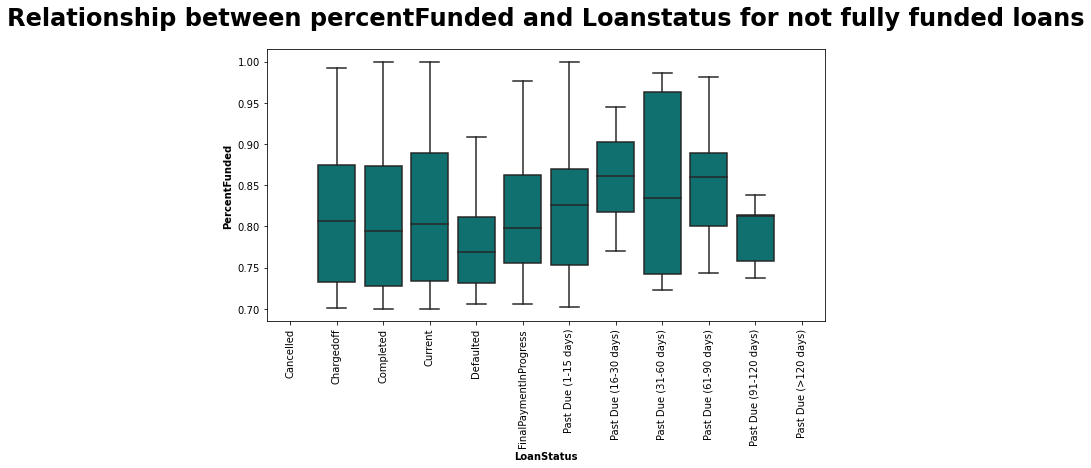

In [9]:
boxplots(10, 5, 'LoanStatus', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Loanstatus for not fully funded loans')

<b> Prosper Rating of C has more percent funded compared to others

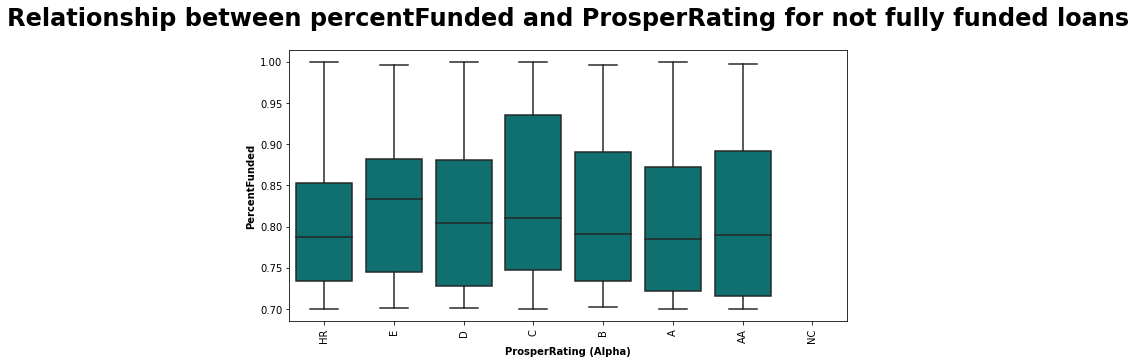

In [10]:
boxplots(10, 5, 'ProsperRating (Alpha)', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ProsperRating for not fully funded loans')

<b> For not fully funded loans, Loans for HomeImprovement, Business, Debt Consolidation, Household Expenses, Medical/Dental and other had largest range of Percent Funded, while Loans for baby and Adoption, Cosmetic Procedures, Green Loans,Not available had the least range with their values being around 81%, 85%, 71% and 83% respectively. The least percent vacation gets is more than other categories.

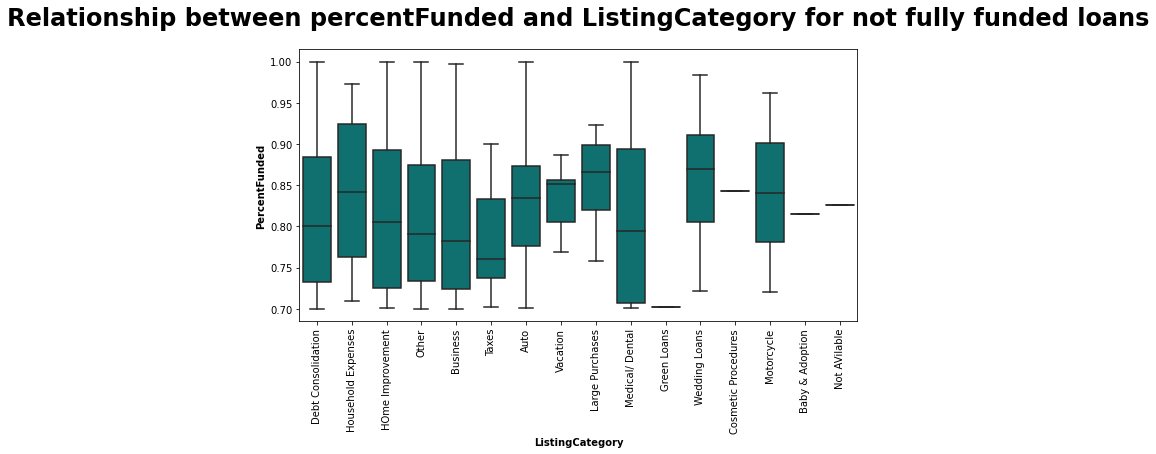

In [11]:
boxplots(10, 5, 'ListingCategory', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ListingCategory for not fully funded loans')

<b> Utah, New Mexico, Alaska, Washington had lower Percent Funding<br> Nevada, Idaho had high percent funded

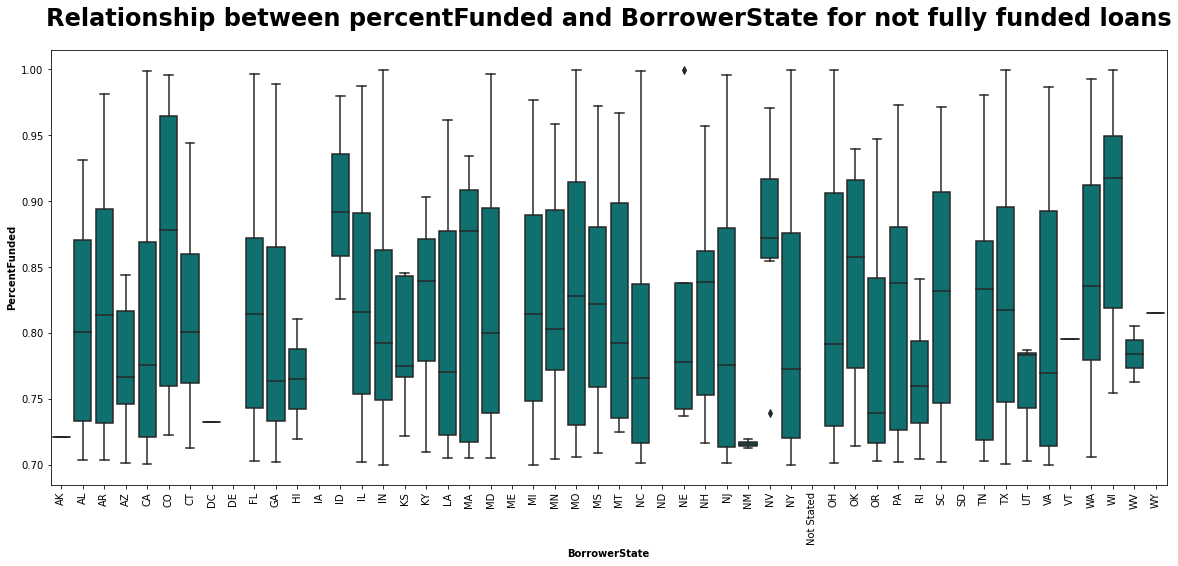

In [12]:
boxplots(20, 8, 'BorrowerState', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and BorrowerState for not fully funded loans')

<b> Occupations of Car dealers, Mechanical engineering had high percent funded,<br> Fireman, chemical engineer had lower percentFunded

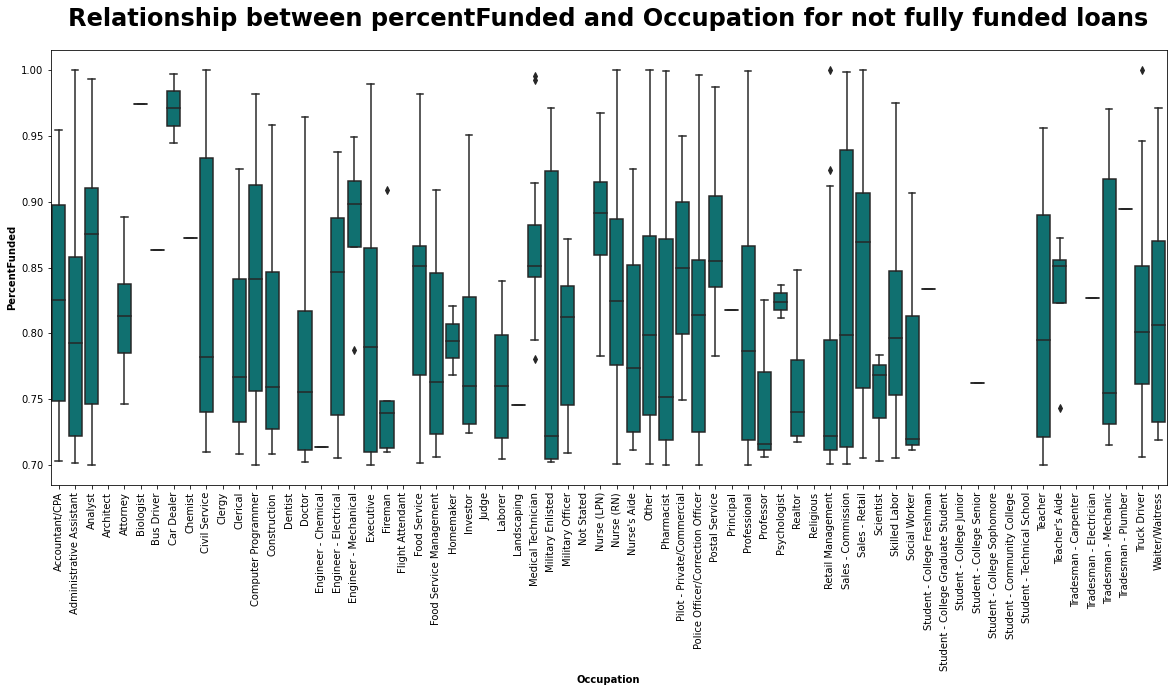

In [13]:
boxplots(20, 8, 'Occupation', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Occupation for not fully funded loans')

In [14]:
def vari(col = None, numerical = False, facet = False, minimum = None, pad = None):
    
    '''To plot relationship between LenderYield, PercentFunded and one categorical variable or
     numerical variable
    
    col: str, categorical variable to plot, 
    numerical: str, numerical variable to plot, 
    facet: bool, if it should be facet plot, 
    minimum: int, minimum value for colorbar,
    pad = The pad for title
    '''
    
    plt.figure(figsize = (10,5))
    if numerical:
        plt.scatter(data = not_including_1, x = 'LenderYield', y = 'PercentFunded', c = col, \
           cmap = 'Accent', vmin = minimum)
        plt.colorbar(label = col)
    elif facet:
        g = sb.FacetGrid(data = not_including_1, col = col, col_wrap =3)
        g.map(sb.regplot, 'LenderYield', 'PercentFunded')
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad = pad)
    else:
        sb.scatterplot(x = 'LenderYield', y = 'PercentFunded', data = not_including_1,\
                       hue = col, s = 70);
    if not facet:
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad  = 10)
        plt.xlabel('LenderYield', fontdict = {'weight':'bold'})
        plt.ylabel('PercentFunded', fontdict = {'weight':'bold'});
    plt.legend(loc = 'right', bbox_to_anchor = (1.5,1))

<b>All ratings had the same range of PercentFunded except E that had the least PercentFUnded to be above 70%, From AA to HR there's decrease in LenderYield

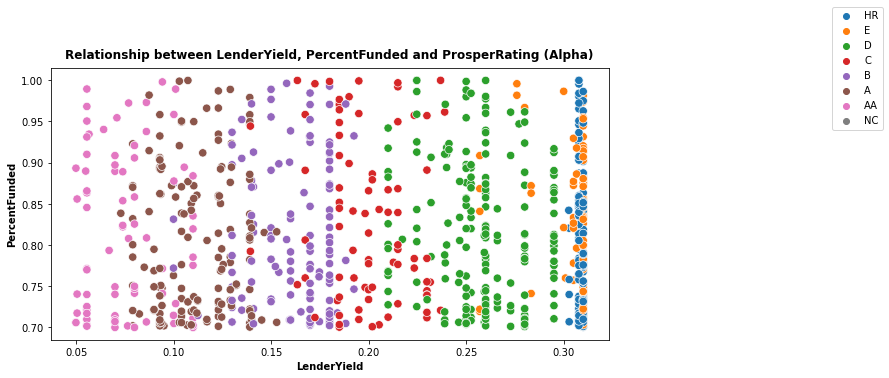

In [15]:
vari('ProsperRating (Alpha)')

<b> Most loans of borrowers in groups had lower Lender Yield, but for not fully funded loans their percentfunded is between 72% and 97%.

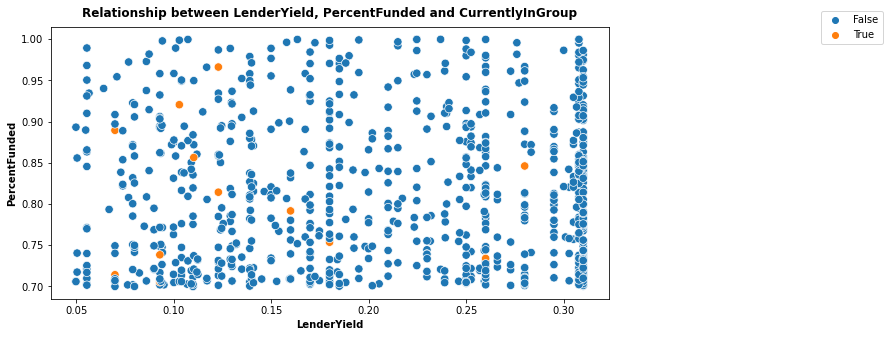

In [16]:
vari('CurrentlyInGroup')

<b> Most loans with totalcredit between 65 and 75 have low Funds percent less than 75%, loans with totalcredit between 35 and 45 have high Funds percent above than 85%

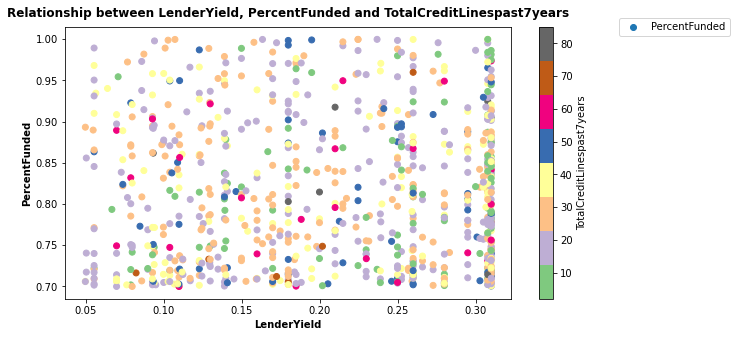

In [17]:
vari(numerical= True, col= 'TotalCreditLinespast7years')

In [18]:
!jupyter nbconvert Part_II_Loan_data_visualisations.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Loan_data_visualisations.ipynb to slides
[NbConvertApp] Writing 977307 bytes to Part_II_Loan_data_visualisations.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\hafsah f. anibaba\anaconda364\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\hafsah f. anibaba\anaconda364\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Hafsah F. Anibaba\Anaconda364\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\hafsah f. anibaba\anaconda364\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\hafsah f. anibaba\anaconda364\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c: